<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

In [16]:
pwd = %pwd
if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
    %cd ./data

file_list = os.listdir()
data_tmp = []
for file in file_list:
    df = pd.read_csv(file)
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)
%cd ..

C:\Users\Admin\Documents\GitHub\DS_Final_project\data
C:\Users\Admin\Documents\GitHub\DS_Final_project


In [17]:
final_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,511977,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1624187,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367194,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,818309,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,511959,$532.18M,7.8


In [18]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,78450,78450,78447,78450.000000,78450,77035,55833,7.845000e+04,4529,78450.000000
unique,60555,552,57146,NaN,1014,61886,35901,NaN,1278,NaN
top,Run,0,Add a Plot,NaN,Documentary,Missy Jubilee,Kevin Dunn,NaN,$0.01M,NaN
freq,15,7605,8135,NaN,5444,26,98,NaN,342,NaN
mean,NaN,NaN,NaN,2014.172569,NaN,NaN,NaN,4.836305e+03,NaN,4.144744
std,NaN,NaN,NaN,26.032289,NaN,NaN,NaN,3.736042e+04,NaN,3.422669
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,1.400000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,2.020000e+02,NaN,7.200000


In [19]:
df = final_df.copy()
df = df[df.rating != 0]
df = df.drop_duplicates(subset=None,keep="first")

df.head()


,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,511977,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1624187,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367194,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,818309,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,511959,$532.18M,7.8


In [20]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [21]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

train_X_df.head().index

Int64Index([49202, 30380, 61848, 16592, 47346], dtype='int64')

In [22]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29834 entries, 49202 to 3929
Data columns (total 9 columns):
title       29834 non-null object
runtime     29834 non-null object
des         29834 non-null object
date        29834 non-null int64
genre       29834 non-null object
cast        29558 non-null object
director    21919 non-null object
vote        29834 non-null int64
gross       2610 non-null object
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


In [23]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12787 entries, 73623 to 69684
Data columns (total 9 columns):
title       12787 non-null object
runtime     12787 non-null object
des         12787 non-null object
date        12787 non-null int64
genre       12787 non-null object
cast        12656 non-null object
director    9363 non-null object
vote        12787 non-null int64
gross       1147 non-null object
dtypes: int64(2), object(7)
memory usage: 999.0+ KB


In [24]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",2019,Crime,"James Zeiss, Vanessa Molinelli, Mitch Damron, ...",NaN,22,NaN
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",2013,"Documentary, Biography, Music","Louis Sarno, Samedi Mathurin Bokombe, Jim Jarm...",Michael Obert,209,NaN
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",2015,Documentary,"Matthijs Ilsink, Peter Klein, Jos Koldeweij, R...",Pieter van Huystee,263,$0.17M
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,2011,Adventure,"Erik Braa, Adam Harrington, Brian Sommer",NaN,13,NaN
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,2015,"Short, Comedy, Drama","Lodric D. Collins, Tami Jordan, Tanda Kerín, T...",Marquette Jones,9,NaN


In [25]:
#df = df.dropna(axis=0)
#df = df.drop_duplicates()

In [26]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [27]:
genre_rating_df.head()

,genre,rating
49202,Crime,7.1
30380,"Documentary, Biography, Music",6.9
61848,Documentary,6.5
16592,Adventure,7.5
47346,"Short, Comedy, Drama",8.2


Counter({'Comedy': 10512, 'Documentary': 8119, 'Drama': 8105, 'Action': 6215, 'Short': 6168, 'Adventure': 4731, 'Crime': 4102, 'Romance': 3999, 'Animation': 3784, 'Biography': 2870, 'Family': 1352, 'Horror': 1311, 'Thriller': 1268, 'Fantasy': 1114, 'History': 1053, 'Sci-Fi': 904, 'Music': 893, 'Mystery': 810, 'Sport': 522, 'Musical': 197, 'News': 191, 'War': 189, 'Reality-TV': 181, 'Talk-Show': 83, 'Western': 72, 'Game-Show': 58})
len =  26


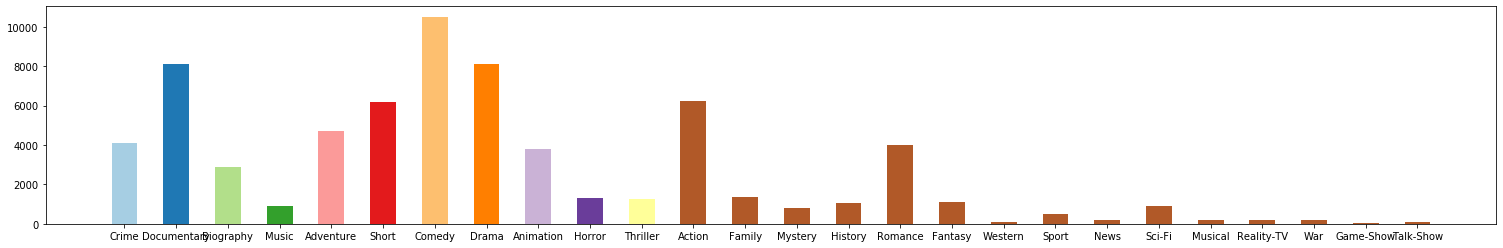

In [28]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

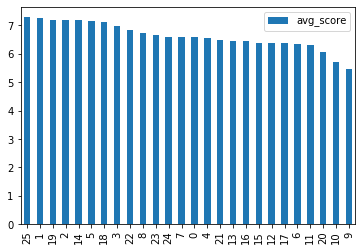

In [29]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [30]:
print(hist_df)

          genre  avg_score
25    Talk-Show   7.298795
1   Documentary   7.260266
19         News   7.194764
2     Biography   7.191916
14      History   7.184995
5         Short   7.151443
18        Sport   7.127395
3         Music   6.975700
22   Reality-TV   6.839227
8     Animation   6.721670
23          War   6.657672
24    Game-Show   6.594828
7         Drama   6.584762
0         Crime   6.576085
4     Adventure   6.561002
21      Musical   6.498985
13      Mystery   6.464074
16      Fantasy   6.456463
15      Romance   6.398225
12       Family   6.380843
17      Western   6.380556
6        Comedy   6.361530
11       Action   6.305889
20       Sci-Fi   6.047788
10     Thriller   5.713407
9        Horror   5.465523


- GENRE to number

In [31]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [32]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [33]:
#add column into df
train_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",2019,Crime,"James Zeiss, Vanessa Molinelli, Mitch Damron, ...",NaN,22,NaN,1.000000
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",2013,"Documentary, Biography, Music","Louis Sarno, Samedi Mathurin Bokombe, Jim Jarm...",Michael Obert,209,NaN,1.673689
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",2015,Documentary,"Matthijs Ilsink, Peter Klein, Jos Koldeweij, R...",Pieter van Huystee,263,$0.17M,1.000000
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,2011,Adventure,"Erik Braa, Adam Harrington, Brian Sommer",NaN,13,NaN,1.000000
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,2015,"Short, Comedy, Drama","Lodric D. Collins, Tami Jordan, Tanda Kerín, T...",Marquette Jones,9,NaN,1.724397


- CAST to number

In [35]:
#replace NaN element in cast to "other"
#train_X_df["cast"] = train_X_df["cast"].fillna("other_cast");

In [36]:

cast_rating_df = train_X_df["cast"].to_frame().join(train_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  65146


In [37]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 48358,
 2: 9762,
 3: 2810,
 4: 1412,
 5: 815,
 6: 497,
 7: 378,
 8: 274,
 9: 173,
 10: 144}

In [38]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('Laura Bailey', 70),
 ('Grey Griffin', 58),
 ('Troy Baker', 56),
 ('Eric Roberts', 51),
 ('Fred Tatasciore', 42),
 ('Dee Bradley Baker', 41),
 ('Eric Bauza', 40),
 ('Ashleigh Ball', 36),
 ('Sean Astin', 36),
 ('Tom Kenny', 35)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [39]:
#TF-IDF 

corpus = cast_rating_df.loc[cast_rating_df.cast.isnull() == False].cast.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = cast_rating_df.cast.copy()

list_sum = []
for i in range(len(cast_rating_df.loc[cast_rating_df.cast.isnull() == False])):
    list_sum.append(tfidf[i].sum())

list_sum_cast[list_sum_cast.isnull() == False] = list_sum
list_sum_cast[list_sum_cast.isnull() != False] = 0

In [40]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [41]:
#add column into df
train_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",2019,Crime,"James Zeiss, Vanessa Molinelli, Mitch Damron, ...",NaN,22,NaN,1.000000,2.72749
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",2013,"Documentary, Biography, Music","Louis Sarno, Samedi Mathurin Bokombe, Jim Jarm...",Michael Obert,209,NaN,1.673689,2.93533
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",2015,Documentary,"Matthijs Ilsink, Peter Klein, Jos Koldeweij, R...",Pieter van Huystee,263,$0.17M,1.000000,2.75147
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,2011,Adventure,"Erik Braa, Adam Harrington, Brian Sommer",NaN,13,NaN,1.000000,2.38388
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,2015,"Short, Comedy, Drama","Lodric D. Collins, Tami Jordan, Tanda Kerín, T...",Marquette Jones,9,NaN,1.724397,2.7592


- DIRECTOR to number

In [43]:
#replace NaN element in cast to "other"
#train_X_df["director"] = train_X_df["director"].fillna("other_director");

In [44]:

director_rating_df = train_X_df["director"].to_frame().join(train_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  65146


In [45]:
#TF-IDF 

corpus =director_rating_df.loc[director_rating_df.director.isnull() == False].director.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = director_rating_df.director.copy()
list_sum = []
for i in range(len(director_rating_df.loc[director_rating_df.director.isnull() == False])):
    list_sum.append(tfidf[i].sum())
list_sum_director[list_sum_director.isnull() == False] = list_sum
list_sum_director[list_sum_director.isnull() != False] = 0

In [46]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [47]:
#add column into df
train_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",2019,Crime,"James Zeiss, Vanessa Molinelli, Mitch Damron, ...",NaN,22,NaN,1.000000,2.72749,0
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",2013,"Documentary, Biography, Music","Louis Sarno, Samedi Mathurin Bokombe, Jim Jarm...",Michael Obert,209,NaN,1.673689,2.93533,1.70656
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",2015,Documentary,"Matthijs Ilsink, Peter Klein, Jos Koldeweij, R...",Pieter van Huystee,263,$0.17M,1.000000,2.75147,1.38174
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,2011,Adventure,"Erik Braa, Adam Harrington, Brian Sommer",NaN,13,NaN,1.000000,2.38388,0
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,2015,"Short, Comedy, Drama","Lodric D. Collins, Tami Jordan, Tanda Kerín, T...",Marquette Jones,9,NaN,1.724397,2.7592,1.69008


- GROSS to number

In [49]:
#replace NaN element in cast to "other"
train_X_df["gross"] = train_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(train_X_df)):
    
    train_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", train_X_df.gross.iloc[i])[0]) * money[train_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [51]:

dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:40])

{0.0: 27374,
 10000.0: 210,
 20000.0: 116,
 30000.0: 74,
 40000.0: 72,
 50000.0: 43,
 60000.0: 41,
 70000.0: 33,
 90000.0: 32,
 120000.0: 31,
 100000.0: 30,
 110000.0: 26,
 80000.0: 17,
 180000.0: 16,
 200000.0: 16,
 130000.0: 15,
 150000.0: 15,
 140000.0: 14,
 300000.0: 13,
 170000.0: 12,
 290000.0: 12,
 210000.0: 11,
 240000.0: 11,
 230000.0: 10,
 560000.0: 10,
 160000.0: 10,
 310000.0: 10,
 530000.0: 10,
 340000.0: 10,
 320000.0: 10,
 220000.0: 10,
 540000.0: 9,
 360000.0: 9,
 260000.0: 9,
 380000.0: 9,
 190000.0: 9,
 330000.0: 8,
 250000.0: 8,
 1010000.0: 8,
 700000.0: 7}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median (vì lượng gross bị lệch nên tính theo mean không tốt) trên dòng không có "0.0" để thay thế

In [52]:
imp = SimpleImputer(missing_values = 0, strategy='median')
train_X_df["gross"] = imp.fit_transform(train_X_df[["gross"]]).ravel()


dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{1420000.0: 27376,
 10000.0: 210,
 20000.0: 116,
 30000.0: 74,
 40000.0: 72,
 50000.0: 43,
 60000.0: 41,
 70000.0: 33,
 90000.0: 32,
 120000.0: 31,
 100000.0: 30,
 110000.0: 26,
 80000.0: 17,
 180000.0: 16,
 200000.0: 16,
 130000.0: 15,
 150000.0: 15,
 140000.0: 14,
 300000.0: 13,
 170000.0: 12}

In [53]:
train_X_df = train_X_df.drop(['cast',"genre","director","date"], axis = 1)
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",22,1420000.0,1.000000,2.72749,0
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",209,1420000.0,1.673689,2.93533,1.70656
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",263,170000.0,1.000000,2.75147,1.38174
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,13,1420000.0,1.000000,2.38388,0
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,9,1420000.0,1.724397,2.7592,1.69008


# scaling

In [54]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",22,1420000.0,1.000000,2.72749,0
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",209,1420000.0,1.673689,2.93533,1.70656
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",263,170000.0,1.000000,2.75147,1.38174
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,13,1420000.0,1.000000,2.38388,0
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,9,1420000.0,1.724397,2.7592,1.69008


In [55]:
scl = StandardScaler()
train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [56]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
49202,Homicide for the Holidays,-1.224851,"For most, the winter holidays mean bringing fa...",-0.155025,-0.11178,-1.633668,0.311316,-1.522936
30380,Song from the Forest,0.842315,"25 years ago, Louis Sarno, an American, heard ...",-0.150652,-0.11178,0.684421,0.706477,0.819313
61848,"Hieronymus Bosch, Touched by the Devil",0.589193,"In 2016, the Noordbrabants Museum in the Dutch...",-0.149389,-0.16944,-1.633668,0.356912,0.373501
16592,The Adventures of Tintin: Secret of the Unicor...,-1.224851,Add a Plot,-0.155235,-0.11178,-1.633668,-0.341982,-1.522936
47346,Forgiving Chris Brown,-0.971729,Forgiving Chris Brown is a dark comedy short t...,-0.155329,-0.11178,0.858900,0.371600,0.796705


# Xử lý tương tự trên tập validation

In [57]:
genre_rating_df = val_X_df["genre"].to_frame().join(val_y_sr)

In [58]:
genre_rating_df.head()

,genre,rating
73623,"Short, Comedy, Drama",6.0
5550,"Short, Action, Drama",7.8
64399,Documentary,8.6
31054,"Documentary, Short, Biography",6.1
41488,"Short, Action, Comedy",9.4


Counter({'Comedy': 4566, 'Drama': 3477, 'Documentary': 3407, 'Action': 2676, 'Short': 2555, 'Adventure': 1977, 'Crime': 1708, 'Romance': 1701, 'Animation': 1696, 'Biography': 1222, 'Family': 601, 'Thriller': 582, 'Horror': 543, 'History': 516, 'Fantasy': 489, 'Music': 384, 'Sci-Fi': 369, 'Mystery': 318, 'Sport': 227, 'Reality-TV': 88, 'News': 83, 'Musical': 78, 'War': 76, 'Talk-Show': 43, 'Western': 28, 'Game-Show': 9})
len =  26


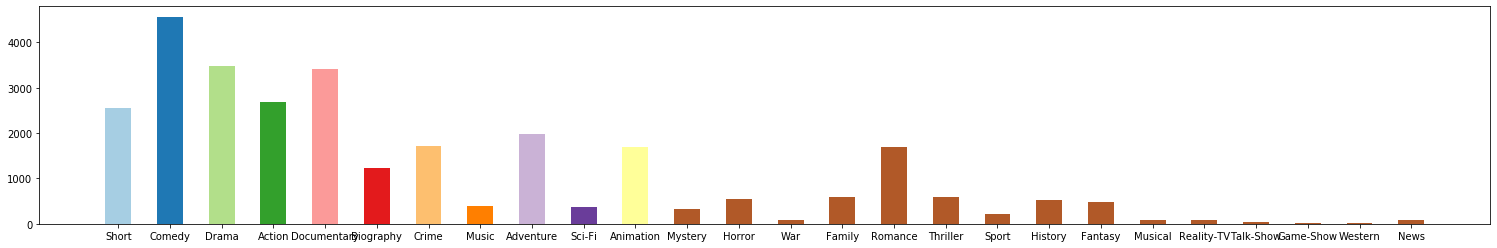

In [59]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

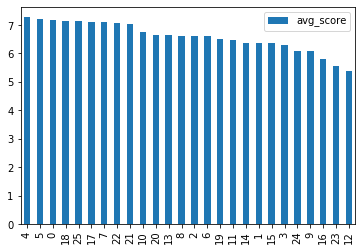

In [60]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [61]:
print(hist_df)

          genre  avg_score
4   Documentary   7.281890
5     Biography   7.210884
0         Short   7.176556
18      History   7.150775
25         News   7.149398
17        Sport   7.118062
7         Music   7.111719
22    Talk-Show   7.055814
21   Reality-TV   7.025000
10    Animation   6.743455
20      Musical   6.661538
13          War   6.632895
8     Adventure   6.628882
2         Drama   6.608456
6         Crime   6.604274
19      Fantasy   6.508793
11      Mystery   6.473899
14       Family   6.379035
1        Comedy   6.360644
15      Romance   6.352557
3        Action   6.313229
24      Western   6.085714
9        Sci-Fi   6.068564
16     Thriller   5.789003
23    Game-Show   5.566667
12       Horror   5.381215


- GENRE to number

In [62]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [63]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [64]:
#add column into df
val_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
73623,Mia,9,"On the eve of her sixteenth birthday, the ...",2014,"Short, Comedy, Drama","Avery Dresel-Kurtz, Reynolds Duck, Josh Green,...",Emi Bell,6,NaN,1.723029
5550,After the Fall,20,"While on a long journey north, a post-apoc...",2017,"Short, Action, Drama","Jordan Jett, Ashley Leake, Cole David Murray, ...",Matthew Manyak,30,NaN,1.729492
64399,Last Chance Lawyer NYC,45,Documentary series following the exploits ...,2018,Documentary,Howard Greenberg,NaN,57,NaN,1.000000
31054,Kehinde Wiley: An Economy of Grace,38,Famous for his vibrant reinterpretations of cl...,2014,"Documentary, Short, Biography",Kehinde Wiley,Jeff Dupre,28,NaN,1.711254
41488,E.T. 2,9,A lonely man befriends a cocaine addicted ...,2015,"Short, Action, Comedy","Ios Alex, Goomba, Joji, Brock Lee",Joji,1409,NaN,1.721724


- CAST to number

In [66]:
#replace NaN element in cast to "other"
val_X_df["cast"] = val_X_df["cast"].fillna("other_cast");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:

cast_rating_df = val_X_df["cast"].to_frame().join(val_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  33311


In [68]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 27258,
 2: 3737,
 3: 1112,
 4: 483,
 5: 268,
 6: 176,
 7: 97,
 8: 49,
 9: 41,
 10: 30}

In [69]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('other_cast', 131),
 ('Grey Griffin', 39),
 ('Troy Baker', 30),
 ('Tara Strong', 26),
 ('Danny Trejo', 21),
 ('Eric Bauza', 21),
 ('Sean Astin', 20),
 ('Steve Blum', 18),
 ('Eric Roberts', 18),
 ('Laura Bailey', 18)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [70]:
#TF-IDF 

corpus = cast_rating_df.loc[cast_rating_df.cast.isnull() == False].cast.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = cast_rating_df.cast.copy()

list_sum = []
for i in range(len(cast_rating_df.loc[cast_rating_df.cast.isnull() == False])):
    list_sum.append(tfidf[i].sum())

list_sum_cast[list_sum_cast.isnull() == False] = list_sum
list_sum_cast[list_sum_cast.isnull() != False] = 0

In [71]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [72]:
#add column into df
val_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
73623,Mia,9,"On the eve of her sixteenth birthday, the ...",2014,"Short, Comedy, Drama","Avery Dresel-Kurtz, Reynolds Duck, Josh Green,...",Emi Bell,6,NaN,1.723029,2.94932
5550,After the Fall,20,"While on a long journey north, a post-apoc...",2017,"Short, Action, Drama","Jordan Jett, Ashley Leake, Cole David Murray, ...",Matthew Manyak,30,NaN,1.729492,2.89005
64399,Last Chance Lawyer NYC,45,Documentary series following the exploits ...,2018,Documentary,Howard Greenberg,NaN,57,NaN,1.000000,1.40241
31054,Kehinde Wiley: An Economy of Grace,38,Famous for his vibrant reinterpretations of cl...,2014,"Documentary, Short, Biography",Kehinde Wiley,Jeff Dupre,28,NaN,1.711254,1.4139
41488,E.T. 2,9,A lonely man befriends a cocaine addicted ...,2015,"Short, Action, Comedy","Ios Alex, Goomba, Joji, Brock Lee",Joji,1409,NaN,1.721724,2.37155


- DIRECTOR to number

In [74]:
#replace NaN element in cast to "other"
val_X_df["director"] = val_X_df["director"].fillna("other_director");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:

director_rating_df = val_X_df["director"].to_frame().join(val_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  33311


In [76]:
#TF-IDF 

corpus =director_rating_df.loc[director_rating_df.director.isnull() == False].director.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = director_rating_df.director.copy()
list_sum = []
for i in range(len(director_rating_df.loc[director_rating_df.director.isnull() == False])):
    list_sum.append(tfidf[i].sum())
list_sum_director[list_sum_director.isnull() == False] = list_sum
list_sum_director[list_sum_director.isnull() != False] = 0

In [77]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [78]:
#add column into df
val_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
73623,Mia,9,"On the eve of her sixteenth birthday, the ...",2014,"Short, Comedy, Drama","Avery Dresel-Kurtz, Reynolds Duck, Josh Green,...",Emi Bell,6,NaN,1.723029,2.94932,1.40931
5550,After the Fall,20,"While on a long journey north, a post-apoc...",2017,"Short, Action, Drama","Jordan Jett, Ashley Leake, Cole David Murray, ...",Matthew Manyak,30,NaN,1.729492,2.89005,1.37794
64399,Last Chance Lawyer NYC,45,Documentary series following the exploits ...,2018,Documentary,Howard Greenberg,other_director,57,NaN,1.000000,1.40241,1
31054,Kehinde Wiley: An Economy of Grace,38,Famous for his vibrant reinterpretations of cl...,2014,"Documentary, Short, Biography",Kehinde Wiley,Jeff Dupre,28,NaN,1.711254,1.4139,1.38342
41488,E.T. 2,9,A lonely man befriends a cocaine addicted ...,2015,"Short, Action, Comedy","Ios Alex, Goomba, Joji, Brock Lee",Joji,1409,NaN,1.721724,2.37155,1


- GROSS to number

In [80]:
#replace NaN element in cast to "other"
val_X_df["gross"] = val_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(val_X_df)):
    
    val_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", val_X_df.gross.iloc[i])[0]) * money[val_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [82]:

dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

{0.0: 11704,
 10000.0: 91,
 20000.0: 60,
 30000.0: 41,
 40000.0: 38,
 100000.0: 19,
 70000.0: 19,
 80000.0: 17,
 60000.0: 17,
 50000.0: 16,
 90000.0: 15,
 160000.0: 12,
 120000.0: 11,
 150000.0: 9,
 130000.0: 9,
 200000.0: 8,
 110000.0: 8,
 140000.0: 7,
 190000.0: 6,
 250000.0: 6}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median để thay thế

In [83]:
imp = SimpleImputer(missing_values = 0, strategy='median')
val_X_df["gross"] = imp.fit_transform(val_X_df[["gross"]]).ravel()


dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{1080000.0: 11705,
 10000.0: 91,
 20000.0: 60,
 30000.0: 41,
 40000.0: 38,
 100000.0: 19,
 70000.0: 19,
 80000.0: 17,
 60000.0: 17,
 50000.0: 16,
 90000.0: 15,
 160000.0: 12,
 120000.0: 11,
 150000.0: 9,
 130000.0: 9,
 200000.0: 8,
 110000.0: 8,
 140000.0: 7,
 190000.0: 6,
 250000.0: 6}

In [84]:
val_X_df = val_X_df.drop(['cast',"genre","director","date"], axis = 1)
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
73623,Mia,9,"On the eve of her sixteenth birthday, the ...",6,1080000.0,1.723029,2.94932,1.40931
5550,After the Fall,20,"While on a long journey north, a post-apoc...",30,1080000.0,1.729492,2.89005,1.37794
64399,Last Chance Lawyer NYC,45,Documentary series following the exploits ...,57,1080000.0,1.000000,1.40241,1
31054,Kehinde Wiley: An Economy of Grace,38,Famous for his vibrant reinterpretations of cl...,28,1080000.0,1.711254,1.4139,1.38342
41488,E.T. 2,9,A lonely man befriends a cocaine addicted ...,1409,1080000.0,1.721724,2.37155,1


# scaling

In [85]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
73623,Mia,9,"On the eve of her sixteenth birthday, the ...",6,1080000.0,1.723029,2.94932,1.40931
5550,After the Fall,20,"While on a long journey north, a post-apoc...",30,1080000.0,1.729492,2.89005,1.37794
64399,Last Chance Lawyer NYC,45,Documentary series following the exploits ...,57,1080000.0,1.000000,1.40241,1
31054,Kehinde Wiley: An Economy of Grace,38,Famous for his vibrant reinterpretations of cl...,28,1080000.0,1.711254,1.4139,1.38342
41488,E.T. 2,9,A lonely man befriends a cocaine addicted ...,1409,1080000.0,1.721724,2.37155,1


In [86]:
scl = StandardScaler()
val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [87]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
73623,Mia,-1.031210,"On the eve of her sixteenth birthday, the ...",-0.155853,-0.1119,0.861844,0.742387,0.072520
5550,After the Fall,-0.802083,"While on a long journey north, a post-apoc...",-0.155315,-0.1119,0.884074,0.623745,-0.007991
64399,Last Chance Lawyer NYC,-0.281338,Documentary series following the exploits ...,-0.154709,-0.1119,-1.625116,-2.354195,-0.977878
31054,Kehinde Wiley: An Economy of Grace,-0.427147,Famous for his vibrant reinterpretations of cl...,-0.155359,-0.1119,0.821342,-2.331196,0.006066
41488,E.T. 2,-1.031210,A lonely man befriends a cocaine addicted ...,-0.124364,-0.1119,0.857356,-0.414190,-0.977878


# To CSV

In [88]:
train_X_df.to_csv("./processed_data/train_X_df.csv",index = False, header = True)
train_y_sr.to_csv("./processed_data/train_y_sr.csv",index = False, header = True)
val_X_df.to_csv("./processed_data/val_X_df.csv",index = False, header = True)
val_y_sr.to_csv("./processed_data/val_y_sr.csv",index = False, header = True)

In [89]:
train_X_df = pd.read_csv("./processed_data/train_X_df.csv")
train_y_sr = pd.read_csv("./processed_data/train_y_sr.csv")


In [91]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
0,Homicide for the Holidays,-1.224851,"For most, the winter holidays mean bringing fa...",-0.155025,-0.11178,-1.633668,0.311316,-1.522936
1,Song from the Forest,0.842315,"25 years ago, Louis Sarno, an American, heard ...",-0.150652,-0.11178,0.684421,0.706477,0.819313
2,"Hieronymus Bosch, Touched by the Devil",0.589193,"In 2016, the Noordbrabants Museum in the Dutch...",-0.149389,-0.16944,-1.633668,0.356912,0.373501
3,The Adventures of Tintin: Secret of the Unicor...,-1.224851,Add a Plot,-0.155235,-0.11178,-1.633668,-0.341982,-1.522936
4,Forgiving Chris Brown,-0.971729,Forgiving Chris Brown is a dark comedy short t...,-0.155329,-0.11178,0.858900,0.371600,0.796705
